### `Ali Almalki`

In [1]:
# Import Libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Models
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier


# Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Model Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

### Read the data

In [2]:
# Read the data into a dataframe 
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Become one with the data😉
Exploratory Data Analysis (EDA)

In [3]:
print(f"Dataset Shape: \n{df.shape}\n")
print(f"Dataset Features: \n{df.columns}\n")
print(f"Dataset Features Data types:\n {df.dtypes}\n")

Dataset Shape: 
(10000, 14)

Dataset Features: 
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Dataset Features Data types:
 RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object



In [4]:
# Dataset Description 
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# Check if there is any null values 
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Get unique values count in each column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
# Check the data again 
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Drop the following columns as they are not useful for the analysis
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
df.head() # Check the data after dropping the above columns

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Check dataset shape again 
df.shape

(10000, 11)

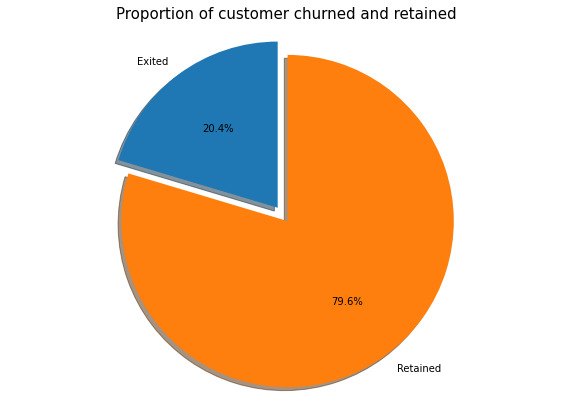

In [10]:
# Visulaise the label 

labels = "Exited", "Retained"
sizes = [df.Exited[df["Exited"]==1].count(), df.Exited[df["Exited"]==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis("equal")
plt.title("Proportion of customer churned and retained", size = 15)
plt.show()

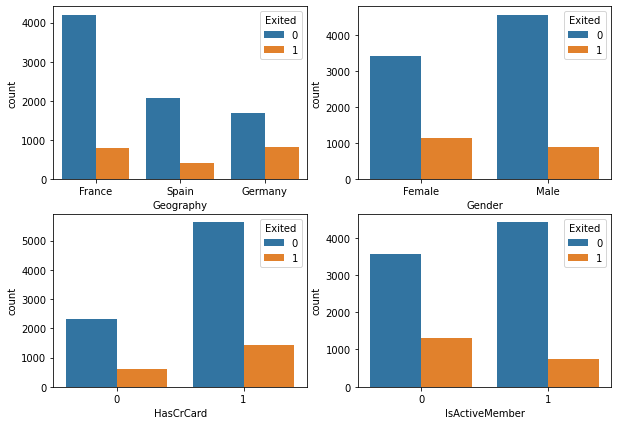

In [11]:
# Check the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(10, 7))
sns.countplot(x="Geography", hue = "Exited",data = df, ax=axarr[0][0]) 
sns.countplot(x="Gender", hue = "Exited",data = df, ax=axarr[0][1])
sns.countplot(x="HasCrCard", hue = "Exited",data = df, ax=axarr[1][0]) 
sns.countplot(x="IsActiveMember", hue = "Exited",data = df, ax=axarr[1][1]);

### Modelling Part👨🏻‍💻

In [12]:
# Split the features and label

X = df.drop("Exited", axis=1) # Everything except target variable

# Target variable
y = df.Exited.values

print(len(X))
print(len(y))

10000
10000


In [13]:
# Features only (no target column)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [14]:
# Label only - first 20 samples
y[:20]

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

### One Hot Encode

In [15]:
# One Hot Encode Gender feature (Male = 1, Female = 0)
X['Gender'].loc[X['Gender']=='Male'] = 1
X['Gender'].loc[X['Gender']=='Female'] = 0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [16]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [17]:
one_hot_features = ["Geography"]
X = pd.get_dummies(X,columns=one_hot_features)

In [18]:
# Check out the training set
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


### Split the data

In [19]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
xtrain, xtest, ytrain, ytest = train_test_split(X, # independent variables (features)
                                                    y, # dependent variable (target --> (Exited))
                                                    test_size = 0.2) # 20% percentage of data to use for test set
# Check train and test lengths
len(xtrain), len(ytrain), len(xtest), len(ytest)

(8000, 8000, 2000, 2000)

In [20]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "Support Vector Machines (SVMs)": svm.SVC(),
          "Decison Tree Classifier": DecisionTreeClassifier()}

models

{'KNN': KNeighborsClassifier(),
 'Logistic Regression': LogisticRegression(),
 'Random Forest': RandomForestClassifier(),
 'Support Vector Machines (SVMs)': SVC(),
 'Decison Tree Classifier': DecisionTreeClassifier()}

In [21]:
# Create function to fit and score models
def fit_and_score(models, xtrain, xtest, ytrain, ytest):
    """
    This function fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    xtrain : training data
    xtest : testing data
    ytrain : labels assosciated with training data
    ytest : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(xtrain, ytrain)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(xtest, ytest)
        
    return model_scores

In [22]:
model_scores = fit_and_score(models=models,
                             xtrain=xtrain,
                             xtest=xtest,
                             ytrain=ytrain,
                             ytest=ytest)
model_scores

{'KNN': 0.764,
 'Logistic Regression': 0.8005,
 'Random Forest': 0.866,
 'Support Vector Machines (SVMs)': 0.8035,
 'Decison Tree Classifier': 0.791}

### Model Comparison

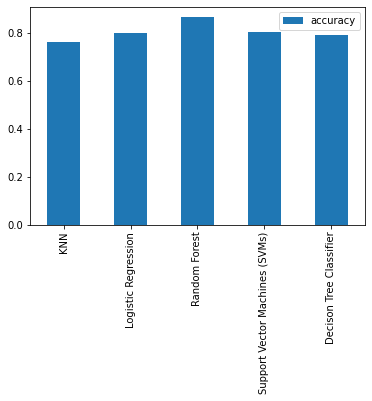

In [23]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

### Random Forest Model - Hyperparameter tuning and cross-validation

In [29]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(models["Random Forest"], hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)

# Fit the model to the training set
bestF = gridF.fit(xtrain, ytrain)

In [27]:
# Check the best parameters
bestF.best_params_

{'max_depth': 25,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 800}

In [28]:
# Evaluate the model
bestF.score(xtest, ytest)

0.8645

### References: 

* [Dataset Source](https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers?resource=download)

* [Sklearn Supervised Learning](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

* [Optimizing Hyperparameters in Random Forest Classification](https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6)


